## Networks : Powers of adjacency matrices, eigenvectors

Using as background Newman's discussion of
Eigenvector Centrality and Katz Centrality in Chapter 7 of **Networks: An Introduction**.

Preparing for that discussion in Chapter 7, we want to find an expression in powers $m$ of matrix 
$A$ that approaches 0 as $m \to \infty$.

Make an n x n symmetric adjacency matrix for an undirected graph with no  self-loops.

In [6]:
import numpy as np
import random


def make_symmetric_adjacency_matrix (n,no_self_loops=1,seed=None):
    """
    no_self_loops=1: We assume A has no self loops, so 
    the diagonal is filled with 0s.
    """
    A = np.zeros((n,n))
    if seed is not None:
        random.seed(seed)
    for i in range (n):
        for j in range(i + no_self_loops, n):
            bit = random.randint(0,1)
            A[i,j] = bit
            A[j,i] = bit
    return A


n = 4

An adjacency matrix is a square matrix (or 2-dimensional array in Python) consisting entirely of 0s and 1s that 
serves as one way of defining a graph.  If $A[i,j] == 1$, then there is a edge
from node $i$ to node $j$.  If the graph is undirected, the matrix is symmetric.  That is, 
$A[i,j] == A[j,i]$.

In [9]:
A = make_symmetric_adjacency_matrix (n,seed=67)
A

array([[0., 0., 0., 1.],
       [0., 0., 1., 1.],
       [0., 1., 0., 1.],
       [1., 1., 1., 0.]])

You can use an adjacency matrix to create a `networkx` graph.

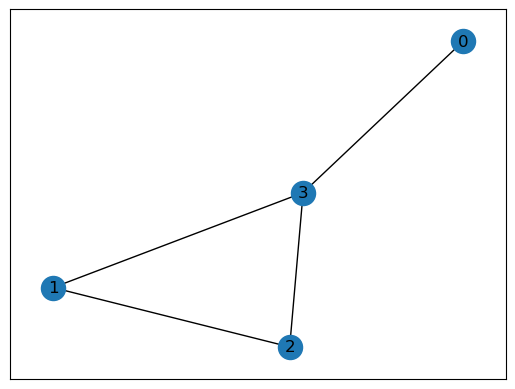

In [10]:
import networkx as nx
G = nx.from_numpy_matrix(A)
nx.draw_networkx(G)

Let's look at some powers of A.  Recall that the `@` represents matrix multiplication, so  $A^{n}$ has very much
the same meaning as $2^{n}$, with matrix multiplication replacing multiplication.

In [11]:
A2 = A @ A
A2

array([[1., 1., 1., 0.],
       [1., 2., 1., 1.],
       [1., 1., 2., 1.],
       [0., 1., 1., 3.]])

This actually has an interpretation we'll come back to: $A^{2}[i,j]$ is the number of paths of length 
2 between vertex $i$ and vertex $j$.  For example, there are two paths of length 2 between vertex 1 and vertex 1.

$$
\begin{array}[t]{l}
1 \rightarrow 2 \rightarrow 1\\
1 \rightarrow 3 \rightarrow 1
\end{array}
$$

In [12]:
A3 = A2 @ A
A3

array([[0., 1., 1., 3.],
       [1., 2., 3., 4.],
       [1., 3., 2., 4.],
       [3., 4., 4., 2.]])

Continuing our interpretation examples: $A3[2,3]$  is 4.  Therefore, there are 4 paths of length 3 between vertex 2 and vertex 3.

$$
\begin{array}[t]{l}
2 \rightarrow 3\rightarrow 1 \rightarrow 3\\
2 \rightarrow 3 \rightarrow 0 \rightarrow 3\\
2 \rightarrow 3\rightarrow  2 \rightarrow 3\\
2 \rightarrow 1\rightarrow  2\rightarrow 3\\
\end{array}
$$

Let's think about why this interpretation works.  Every path of length 3 from vertex 2 to vertex 3
must be an extension of 

  1. a path of length 2 from vertex 2 to some other vertex $i$;and
  
  2. $i$ must be connected to vertex 3.
 
The information we need for (1) is in $A2[2,:]$ and the information we need for (2) is in 
$A[:,3]$ and according to the definition of matrix multiplication

$$
(A2 @ A)[2,3] = A2[2,:] \cdot A[:,3] = \sum_i A2[2,i] \times A[i,3]
$$

will contain the number of paths satisfying (a) and (b);
that is, it sums up how many paths of length 2 from vertex 2 to some vertex $i$
can be extended to paths to vertex 3.

In [123]:
A4 = A3 @ A
A4

array([[ 3.,  4.,  4.,  2.],
       [ 4.,  7.,  6.,  6.],
       [ 4.,  6.,  7.,  6.],
       [ 2.,  6.,  6., 11.]])

In [124]:
A5 = A4 @ A
A5

array([[ 2.,  6.,  6., 11.],
       [ 6., 12., 13., 17.],
       [ 6., 13., 12., 17.],
       [11., 17., 17., 14.]])

In general this diverges, the numbers getting bigger and bigger.

But suppose we take powers of $\alpha A$ instead of just $A$. As long as $\alpha^m$ gets
smaller faster than the path numbers grow, $(\alpha A)^m$  can converge to 0.

In practice values of $\alpha$ much smaller than 1 seem to be required.  To illustrate, let's try $\alpha = .5$.

In [125]:
A6 = A5 @ A
print(A6)
A7 = A6 @ A
print(A7)
A8 = A7 @ A
print(A8)
A9 = A8 @ A
print(A9)
A10 = A9 @ A
A10

[[11. 17. 17. 14.]
 [17. 30. 29. 31.]
 [17. 29. 30. 31.]
 [14. 31. 31. 45.]]
[[14. 31. 31. 45.]
 [31. 60. 61. 76.]
 [31. 61. 60. 76.]
 [45. 76. 76. 76.]]
[[ 45.  76.  76.  76.]
 [ 76. 137. 136. 152.]
 [ 76. 136. 137. 152.]
 [ 76. 152. 152. 197.]]
[[ 76. 152. 152. 197.]
 [152. 288. 289. 349.]
 [152. 289. 288. 349.]
 [197. 349. 349. 380.]]


array([[197., 349., 349., 380.],
       [349., 638., 637., 729.],
       [349., 637., 638., 729.],
       [380., 729., 729., 895.]])

Looking at the max values in some of the power matrices and multiplying them by $\alpha^m$, we get:

In [126]:
A7.max()

76.0

In [127]:
m,maxval = 7,A7.max()
(.5)**m * maxval

0.59375

In [128]:
m,maxval = 8,A8.max()
(.5)**m * maxval

0.76953125

In [129]:
m,maxval = 10,A10.max()
(.5)**m * maxval

0.8740234375

Not getting smaller, which is what we'd like for an expression with 0 as a limit..  But suppose $\alpha=.01$.

In [133]:
alpha = .01
print(f"{alpha**7 * A7.max():.2e}")
print(f"{alpha**8 * A8.max():.2e}")
print(f"{alpha**10 * A10.max():.2e}")
print(f"{alpha**20 * (A10@A10).max():.2e}")

7.60e-13
1.97e-14
8.95e-18
2.01e-34




But all this depends on the convergence of $(\alpha A)^{m}$.
and that works fine for the given example an $\alpha$-value of .01, 
but will an $\alpha$-value of .01 work for all cases?
If so, why?  If not, why not?  We next address the question of how to choose $\alpha$
so as to guarantee convergence.

Let's consider an iterative process that uses powers of $A$.  For instance, define:

$$
x_m  = Ax_{m-1}.
$$

By $x_m$  we mean the $m$th estimate of vector $x$ in our successive estimations of $x$.  
We are computing $x$ through an iterative process starting
with some given initial value $x_{0}$, and each succeeding value is obtained from the
previous simply by multiplying by $A$. It follows:

$$
x_{m}  = A^{m}x_{0}
$$

Now whatever $x_{0}$ is, linear algebra tells us we can
write $x_{0}$ as a linear combination of the eigenvectors of A:

$$
x_{0} = \sum_{i} c_{i} v_{i},
$$

for appropriate choice of the $c_{i}$. Then 

$$
x_{m} = A^{m} \sum_{i} c_{i} v_{i} =  \sum_{i} c_{i} \kappa_{i}^{m}  v_{i} = \kappa_{1}^{m} \sum_{i} c_{i} \left \lbrack \frac{\kappa_{i}}{\kappa_{1}}\right \rbrack^{m} v_{i} 
$$

where $\kappa_{1}$ is the leading or largest eigenvalue.  Then, since $\kappa_{i}/\kappa_{1} < 1$ whenever $i\neq 1$,
all the $i\neq 1$ terms will tend toward 0.  Then

$$
\lim_{m \to \infty} A^{𝑚} 𝑥(0) = \kappa_{1}^{m} c_{1} \left \lbrack \frac{\kappa_{1}}{\kappa_{1}}\right \rbrack^{m} v_{1} 
= \kappa_{1}^{m} c_{1} v_{1} 
$$

That is, applying $A^{m}$ to **any** vector converges on a vector proportional to $v_{1}$, the first eigenvector of A. The significance of that is that any vector proportional to a first eigenvector $v_{1}$ is still a first eigenvector, that is, it is in the same
**eigenspace**, so we will get a vector that is a first eigenvector.  Using the eigenvector
we can always easily find the eigenvalue.

Returning to $A^{m}$ itself, if we want $\alpha^{m} A^{m}$ to converge to a matrix with 0 values, we need
to use $\alpha$ such that

$$
\alpha \lt \kappa_{1}.
$$



$$
\lim_{m \to \infty} \alpha^{m} A^{𝑚} 𝑥(0) < \kappa_{1}^{-m} \kappa_{1}^{m} c_{1} v_{1} = c_{1} v_{1}.
$$

So we clearly have a bound on the value.  To find the value of the limit, consider the fact
that if $\alpha \lt \kappa_{1}^{-1}$ and $\kappa_{1}^{-1}$ is positive, 
then there is some $0 < \eta \lt 1$ such that $\alpha = \eta\kappa^{-1}$. Then

$$
\begin{array}[t]{lcl}
\lim_{m \to \infty}\alpha^{m} A^{𝑚} 𝑥(0) &=& \lim_{m \to \infty} \eta^{m} \kappa_{1}^{-m} \kappa_{1}^{m} c_{1} v_{1} \\
                                         & = &\lim_{m \to \infty} \eta^{m} c_{1} v_{1} \\
                                         &= & {\mathbf 0},
\end{array}
$$

since $c_{1}v_{1}$ is constant and $\eta^m$ dwindles to 0 as $m\to \infty$.

Alternatively, consider what happens when $\eta \gt 1$ (because $\alpha \gt \kappa_{1}^{-1}$).
Then $\eta^m$ diverges to  $\infty$ and so does $\eta^{m} c_{1} v_{1}$.

Finally, consider what happens when $\eta = 1$ (because $\alpha = \kappa_{1}^{-1}$).
This is the same as not using $\alpha$ at all, and amounts to asking what the limit of
the infinite sum is, which as we saw is a first eigenvector.

Let's try this out on our example above.  First we make  a suitable $\alpha$.

In [13]:
from numpy.linalg import eig


A = make_symmetric_adjacency_matrix (n,seed=67)

def make_alpha (A,eps=.001):
    (evals, evecs) = eig(A)
    lead_eval_ind = np.argmax(evals)
    kappa_1,evec_1 = evals[lead_eval_ind],evecs[lead_eval_ind]
    #Alpha just slightly less than kappa^{-1}
    return (1/kappa_1) - eps

alpha = make_alpha(A)

Looking for convergence as we run the powers of A and extract the max values in the matrix
to be scaled by a power of our carefully chosen $\alpha$.

In [15]:
n = 4
x = np.zeros(250)
#
Ai = np.eye(n)
for i in range(250):
    x[i] = (alpha**i) * Ai.max()
    Ai = A@Ai

And we see that after some wiggling, the maximum value of $A^{m}$ commences to head "straight" down (the descent is not linear, despite its appearance in the graph).


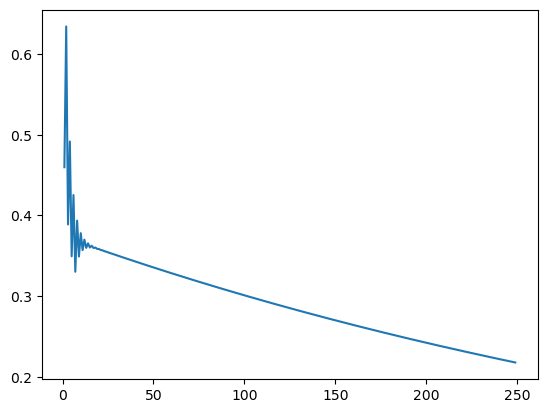

In [16]:
import matplotlib
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1)
ax.plot(np.arange(1,250),x[1:])

Looking at some sample values we confirm what the picture shows: the downward trend begins in the vicinity of $m=20$.

In [308]:

x = np.zeros(100)
print(f"  7: {alpha**7 * A7.max():.2e}")
print(f"  8: {alpha**8 * A8.max():.2e}")
print(f" 10: {alpha**10 * A10.max():.2e}")
print(f" 20: {alpha**20 * (A10@A10).max():.2e}")
A40 = A10@A10@A10@A10
print(f" 40: {alpha**40 * A40.max():.2e}")
A80,A120,A160 = A40**2,A40**3,A40**4
print(f" 80: {alpha**80 * (A80).max():.2e}")
print(f"120: {alpha**120 * (A120).max():.2e}")
print(f"160: {alpha**160 * (A160).max():.2e}")

  7: 3.30e-01
  8: 3.94e-01
 10: 3.78e-01
 20: 3.58e-01
 40: 3.43e-01
 80: 1.18e-01
120: 4.03e-02
160: 1.38e-02


#### Katz Centrality

In this section, we discuss **Katz Centrality**, introduced in a very highly cited paper
[Leo Katz: A New Status Index Derived from Sociometric Index. Psychometrika 18(1):39–43, 1953](https://link.springer.com/content/pdf/10.1007/BF02289026.pdf).

The remarks above lead very quickly to an application for our limit.  We start
with the following fact. The expression $\alpha^{m} A^{m}$ arises in the following context:

$$
(1)\;\; \sigma = \lim^{\infty}_{m = 0} \sum \alpha^{m}A^{m} 
$$

where $\sigma$ is the NxN **regular equivalence matrix** (Newman Section 7.12.4) of a network with adjacency matrix A.
Two vertices are regularly equivalent if they "have neighbors
who are themselves are similar". (p. 217) (so they may
be similar in this sense, even if they don't actually share any neighbors).
Based on our reflections about what $A^{m}$ means, this definition  says
two vertices are regularly equivalent if they are connected to many of the same paths, where we
consider paths of all lengths.  Moreover, if $0\lt \alpha \lt 1$  (which is how we've been using $\alpha$),
then longer paths will contribute exponentially less to the values in $\sigma$.

Now in order for $\sigma$ to be well-defined we have to show the limit of this sum exists
(the fact that the nth term of the sum approaches 0 is not enough to guarantee the sum
has a limit).  Consider:
$$
\begin{array}[t]{cc}
(6) &
\begin{array}[t]{lcl}
I - \alpha^{m}A^{m} & = & (\alpha^m A^m + \alpha^{m-1} A^{m-1} + \dots + \alpha^2 A^2 + \alpha A  + I) (I - \alpha A) \\
& = & (\sum \alpha^{m}A^{m})(I - \alpha A) 
\end{array}
\end{array}
$$

We saw that for an appropriately chosen $\alpha$, the expression on the LHS of the equality approaches $I$ as $m \to \infty$.
Therefore

$$
(7) \lim^{\infty}_{m = 0} \sum \alpha^{m}A^{m}  = (I - \alpha A)^{-1}
$$

So we see that the limit exists if and only if $(I - \alpha A)$ has an inverse (more discussion on what that means below), and therefore we can add to (1) as follows:

$$
(1')\;\; \sigma = \lim^{\infty}_{m = 0} \sum \alpha^{m}A^{m}  = (I - \alpha A)^{-1}
$$


Newman observes that the last expression on (1')
resembles the expression for **Katz Centrality** in Section 7.3 p. 173,
equation (7.10).  The centrality vector
$x$ (in which $x_{i}$ gives the centrality score for vertex $i$) is defined

$$
(8) \;\;\text{Katz Centrality}(A) = x = (I - \alpha A)^{-1} {\mathbf 1}  = \sigma {\mathbf 1}
$$

Here ${\mathbf 1}$ is the vector $\lbrace 1,\,1,\,1,\, \dots ,\, 1 \rbrace$.  Since $\sigma$ is a matrix of similarity values, then the centrality $x_{i}$ is just the sum of the similarities of
vertex $i$ to all vertices.  We might call this a typicality score rather than a centrality score, but let's stick with the standard terminology for now.  So what is called Katz Centrality in the literature
can be defined in terms of regular equivalence, a particular kind of similarity.  Newman suggests we might
want to call this kind of similarity **Katz similarity** (not the usual term) instead of regular equivalence (the usual term).

So we've discussed how $\alpha^{m}A^{m}$ shows up in the definition of regular equivalence (or "Katz Similarity") and how that can be used to define a measure of Centrality.  But how do powers of A relate to intuitions
about centrality?

#### Explaining Katz centrality

The leading intuition of Katz Centrality (and Eigenvector Centrality, from which it is derived) is that the centrality of a node $x_{i}$ is proportional to the sum of the centralities of its neighbors.  This can be motivated as follows.  A fundamental definition of centrality is degree centrality, which simply defines the centrality
of a vertex as its degree, or the number of its neighbors.  But not all neighbors are equal.  Some
are more important than others.  Therefore a better characterization of the centrality is gotten
by taking a weighted sum of a vertex's neighbors, with each vertex's contribution weighted
by its own importance, or centrality.  That is, the importance of vertex $i$, or the value $x_{i}$
in the centrality vector is

$$
\begin{array}[t]{cc}
(3) &
\begin{array}[t]{lcl}
x_{i} &= &\alpha \sum_{j} A_{ij} x_{j}\\
\end{array}
\end{array}
$$

The utility of $\alpha$ will be discussed below.  In Matrix notation, we have:

$$
\begin{array}[t]{cc}
(4) &
\begin{array}[t]{c}
 x = \alpha A x
\end{array}
\end{array}
$$

This is Eigenvector Centrality.  So the leading intuition of Eigenvector Centrality amounts to saying the centrality vector $x$ is an eigenvector of A and the proportionality 
factor $\alpha$ is the inverse of the eigenvalue of $x$.

$$
\begin{array}[t]{cc}
(4') &
\begin{array}[t]{c}
 A x = \alpha^{-1} x
\end{array}
\end{array}
$$

Note that this is reminscent of our discussion of how to find an appropriate value for $\alpha$
in the infinite sum in (1).  We return to
this point below, after modifying this definition.

The definition in (4) has some technical problems discussed in Section 7.2, especially in directed networks, having to do with vertices which have no incoming nodes, leading to 0-centrality values which then 
propagate through the network according to (4).  These are addressed by Katz Centrality. In Katz Centrality, the centrality vector $x$ is initialized with an arbitrary centrality value (let's say 1) conferred on every node.
Then $x$ is defined via a small modification of (4):

$$
\begin{array}[t]{cc}
(5) &
\begin{array}[t]{l}
x = \alpha A x + {\mathbf 1}\\
x - \alpha A x = {\mathbf 1} \\
x (I - \alpha A) = {\mathbf 1} \\
x = (I - \alpha A)^{-1} {\mathbf 1} = \sigma{\mathbf 1},
\end{array}
\end{array}
$$

where $\sigma = \lim^{\infty}_{m = 0} \sum \alpha^{m}A^{m}$.

That relation in turn can be related to our first observation about powers of
A.  $ A^{m}[i,j]$ contains the number of occurrences of paths of length $m$
starting at vertex $i$ and ending at vertex $j$.  Call such neighbors of $j$
$m$th-order neighbors. 
The $m$th term in the power sum  --- $ \alpha^{m} A^{m}{\mathbf 1}$ ---
deals with the contribution of the
$m$th order neighbors to the overall centrality of $j$.

$$
\begin{array}[t]{ll}
m  & \alpha^{m}A^{m}[i,j]\\
\hline
1  &  \alpha^{1}\times \text{ the number of paths of length 1 from $i$ to $j$: degree centrality}\\
2  &  \alpha^{2}\times\text{ the number of paths of length 2 from $i$ to $j$: 2nd order degree centrality }\\
   & \dots \\
m  &  \alpha^{m}\times\text{ the number of paths of length $m$ from $i$ to $j$: $m$th order degree centrality}\\
\end{array}
$$

This clarifies the role of $\alpha$.
As $m$ grows larger, the paths grow longer, and their
contribution to $x$ decays exponentially, because $\alpha \lt 1$.
Thus the choice of $\alpha$ governs how quickly the contributions of 
paths of greater length diminish; ultimately it also governs
the balance between the initial intrinsic centrality values and 
those inherited from neighbors.


In contrast, classic degree centrality takes into account only
first-order neighbors.
Thus, Katz centrality can be viewed as a generalization
of degree centrality which takes into account 
not just first-order paths, but all paths.
Using Katz Centrality a node with a small number of neighbors
can have high centrality if those neigbors 
have high centrality.


Computing $\sigma$, the similarity matrix for a matrix $A$.

In [290]:
from numpy.linalg import inv

n = 8
One = np.ones(n)
I = np.diag(One)

# Make sure we get the SAME network in multiple iterations of this notebook.
random.seed(41)
A = make_symmetric_adjacency_matrix(n)

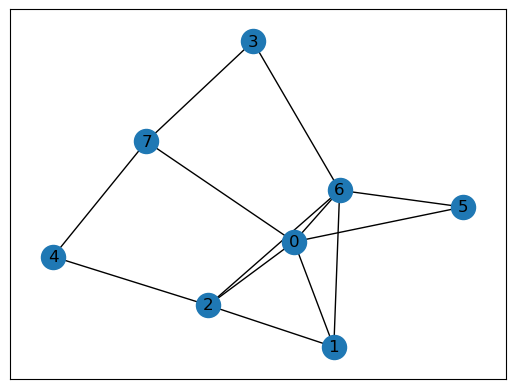

In [283]:
G = nx.from_numpy_matrix(A)
nx.draw_networkx(G)

In [291]:
alpha = make_alpha(A,eps=.001)
#  Note with Big matrices this is prohibitively expensive (Order n^2)
#  We might do better using a sum of powers of A to estimate sigma (see below).
sigma = inv(I - (alpha*A))
sigma

array([[66.90214834, 51.4942948 , 56.70155189, 26.51168895, 24.27008839,
        36.00553801, 64.90764822, 32.14687504],
       [51.4942948 , 40.96555292, 44.22866036, 20.60554929, 18.86957675,
        27.88392657, 50.5837435 , 24.8494651 ],
       [56.70155189, 44.22866036, 49.5244835 , 22.70546548, 21.02205877,
        30.70041193, 55.68713258, 27.43349139],
       [26.51168895, 20.60554929, 22.70546548, 11.74629392,  9.78733155,
        14.40325992, 26.21605417, 13.12419441],
       [24.27008839, 18.86957675, 21.02205877,  9.78733155, 10.03233145,
        13.12713153, 23.7859783 , 12.04368159],
       [36.00553801, 27.88392657, 30.70041193, 14.40325992, 13.12713153,
        20.49771494, 35.37208836, 17.35565476],
       [64.90764822, 50.5837435 , 55.68713258, 26.21605417, 23.7859783 ,
        35.37208836, 64.58320314, 31.38905441],
       [32.14687504, 24.8494651 , 27.43349139, 13.12419441, 12.04368159,
        17.35565476, 31.38905441, 16.65626001]])

Computing the centrality vector.

In [292]:
x = sigma @ One
x

array([358.93983364, 279.48076929, 308.0032559 , 145.09983769,
       132.93817833, 195.34572601, 352.52490269, 174.99867671])

The most central vertex by Katz centrality.

In [293]:
x.argmax()

0

Compare to degree centrality.  Here is A.

In [294]:
A

array([[0., 1., 1., 0., 0., 1., 1., 1.],
       [1., 0., 1., 0., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 1., 0.],
       [1., 1., 1., 1., 0., 1., 0., 0.],
       [1., 0., 0., 1., 1., 0., 0., 0.]])

Note that by degree centrality, nodes 0 and 6 are tied for the most important:

In [295]:
A.sum(axis=1)

array([5., 3., 4., 2., 2., 2., 5., 3.])

But by Katz Centrality the connections of vertex 0
make it more important:

In [289]:
x

array([358.93983364, 279.48076929, 308.0032559 , 145.09983769,
       132.93817833, 195.34572601, 352.52490269, 174.99867671])

#### Demonstrating the powers relation

All the math above not only helps us get at the intuitions of the Katz Centrality.
It also provides a useful, efficient way of estimating $\sigma$ by summing
powers of $A$ instead of finding the inverse of A. We demonstrate.

Let 

$$
\sigma'(m) = \sum \alpha^{m}A^{m}
$$

So $\sigma'(m)$ is our estimate of $\sigma$ for $m$, a given power of A.

We show by example that convergence of $\sigma'$ to $\sigma$ is slow but steady:

In [245]:
M=3_501

res = I
sigma_prime = res

def mdiff (M1,M2):
    return (M1-M2).max()

banner = "  m   Mx diff  sigma' sum"
print(f"sigma sum: {sigma.sum():.4f}")
print()
print(banner)
print("="* len(banner))
for m in range(1, M):
    res = alpha * (res @ A)
    sigma_prime = sigma_prime + res
    if m%250 == 0:
        print(f"{m:>4} {mdiff(sigma,sigma_prime):>8.5f}  {sigma_prime.sum():>7.4f}")

sigma sum: 1597.0525

  m   Mx diff  sigma' sum
 250 11.41921  1116.2786
 500  3.45482  1451.5972
 750  1.04523  1553.0459
1000  0.31623  1583.7386
1250  0.09567  1593.0245
1500  0.02895  1595.8339
1750  0.00876  1596.6838
2000  0.00265  1596.9410
2250  0.00080  1597.0188
2500  0.00024  1597.0423
2750  0.00007  1597.0495
3000  0.00002  1597.0516
3250  0.00001  1597.0523
3500  0.00000  1597.0525


#### Properties of the Katz Centrality Matrix

Let us call the matrix

$$
(9)\; ({\mathbf I} - \alpha A),
$$

which we used to define Katz-Centrality in equation (5), the **Katz Centrality
Matrix** (KCM).  This matrix very closely
resembles one that comes up often in Linear Algebra.
We will discuss the matrix that crops up in Linear Algebra, which will
help clarify how setting values for $\alpha$ works.

Consider the determinant of the
the Katz Centrality matrix and in particular,
consider the possibility that it is equal to 0.

$$
(10)\; Det({\mathbf I} - \alpha A) = 0.
$$

Multiplying $I - \alpha A$ by $-\alpha^{-1}$ will still give us a matrix
with determinant 0 ($Det(kM) = k^{n}Det(M)$):

$$
(10')\; Det(\alpha^{-1}{\mathbf I} - A) = 0
$$

But now we have a matrix that defines the characteristic polynomial for matrix A,
whose eigenvalue is $\alpha^{-1}$; that is,
the values for $\alpha^{-1}$ that satisfy this equations are
the eigenvalues for A.  

So how does this relate to Katz Centrality?
The definition of Katz Centrality uses the **inverse** of
the matrix in (10) which has the same determinant as $(\alpha^{-1}{\mathbf I} - A)$,
but a matrix with determinant 0 has no inverse, so
the inverse needed for Katz Centrality ceases to exist precisely when
$\alpha^{-1}$ is an eigenvalue for $A$. More precisely, it grows very large or diverges
as $\alpha$ approaches $\kappa^{-1}$. So we have reached the same
conclusion we reached above about the right value for $\alpha$
by a different route.  We looked at the infinite
series of powers of A, which had the inverse of the Katz Centrality matrix as a limit,

$$
(11)\; \lim^{\infty}_{m = 0} \sum \alpha^{m}A^{m}  = (I - \alpha A)^{-1},
$$

and we discovered that for any vector 
$$
\lim_{m \to \infty} \alpha^{m} A^{𝑚} 𝑥(0) = {\mathbf 0},
$$
when $\alpha \lt k_{1}^{-1}$, where $\kappa_{1}$ is the leading eigenvalue.
That's good news for the infinite sum in (11).  On the other hand, if $\alpha^{m} = \kappa^{-1}$,
then in the limit 

$$
(12)\; \lim_{m \to \infty} \alpha^{m} A^{𝑚} 𝑥(0) 
$$

diverges.

#### Linear algebra digression

Let's review one important case where (10') arises in Linear Algebra,
in finding eigenvectors.

We start with the basic condition for an eigenvector

$$
(13) \begin{array}[t]{l}
Av = \kappa v\\
(\kappa I - A)v = {\mathbf 0}
\end{array}
$$

That is, the eigenvector $v$ is in the null space of the matrix $(\kappa I - A)$
(the set of vectors the matrix maps to the zero vector ${\mathbf 0}$).
We're interested in non-trivial solutions, $v$ other than the zero vector.
If there are any, then the matrix $(\kappa I - A)$ must have a non trivial null space;
This condition can only be satisfied when there is a non trivial linear combination of 
the columns of $(\kappa I - A)$ equal to 0. That means $(\kappa I - A)$
is of reduced rank (rank less than $n$),  That has a very useful consequence.
It means the determinant  of $(A - \alpha I)$  is 0.  So the equation we usually
solve to find eigenvalues is

$$
Det(\kappa I - A) = 0.
$$

It is not very hard to show that a reduced rank matrix must have a determinant of 0.
Sketching the idea: Reduced rank means that one of the columns of $M =(\kappa I - A)$ can be expressed
as a linear combination of the others.
So if we start with a series of matrices $M_{i}$, each with one duplicated column, we can express
$M$ as a linear combination of the $M_{i}$s.  Since the $Det(M_{i}) = 0$ for each $M_{i}$,
and $Det(M)$ is a **multilinear function** of M, $Det(M)$ must be
0. (Note: The term multilinear here means that Det(M) is linear in each of the columns of M).

A matrix with a determinant of 0 is called **singular**; singularity
can be defined in different ways because there are a lot of closely
related properties that swirl around the notion of a matrix with
determinant 0.  The following are all equivalent descriptions 
of a matrix $A$.

  1.  A has reduced rank;
  2.  A has a non trivial null space;
  3.  A is noninvertible (= does not have an inverse);
  4.  A has determinant of 0.
  5.  The linear mapping $L: R^{n} \to R^{n}$ associated
      with $A$ is not 1-1.

For example, to show property 2 implies property 3, 
we prove the contrapositive of  2 $\rightarrow$ 3:  Invertibility
implies a trivial null space.

Suppose  then that $A$ has an inverse,
and that $Av = {\mathbf 0}$ for some vector $v$.
We show $v$ must be ${\mathbf 0}$:
$$
(14) \begin{array}[t]{l}
Av = 0\\
A^{-1}Av = A^{-1}0\\
Iv  = 0
\end{array}
$$

It follows that $v$ is ${\mathbf 0}$.  

So let's sum up what we know about constraints on $\alpha$
in the definition of Katz Centrality.

We have  as the solution for $x$ in Katz Centrality

$$
x = (I - \alpha A)^{-1} {\mathbf 1}
$$

Setting $\alpha$ to 0 gives us the centrality vector
in which all vertices have the same centrality, that is, 1.

Increasing $\alpha^{-1}$ the centralities increase up
until $\alpha^{-1} = \kappa_{1}$ at which point they
diverge to infinity or are undefined.   Of course they are defined again
when we start with $\alpha$ values above $\kappa^{-1}$,
but let's not go there because we have no interpretation
for centrality values that diverge to infinity. We
restrict our attention to the interval

$$
0 \leq \alpha \lt \kappa^{-1}.
$$

We will call the set of values outside this interval the **forbidden zone**.

**FootNote**: We rely on the fact that all the eigenvalues of an adjacency matrix are positive.  
Therefore as $\alpha$ inches upward from 0 it will reach $\kappa_{1}^{-1}$,
the smallest of the eigenvalue inverses, first.

#### The Forbidden Zone

Let's demonstrate divergence in forbidden zone of $\alpha$ in Python.

In [4]:
from numpy.linalg import inv
from numpy.linalg import det
from numpy.linalg import eigvals, eigvalsh
import random

def katz_centrality_matrix(A,v=1):
    """
    v is a candidate alpha value.  Note this is not the
    characteristic polynomial matrix, but $- \alpha^{-1}$
    times the characteristic polynomial matrix.
    """
    (m,n) = A.shape
    assert m == n, "Only square matrices have well-defined characteristic polynomials."
    return np.eye(m) - v*A
                
def det_katz_centrality_matrix(A,v=1):
  #return det(np.eye(m) - v*A)
  return det(katz_centrality_matrix(A,v))

def make_alpha (A,eps=.001):
    #Alpha just slightly less than kappa^{-1}
    return 1/find_leading_eigenval(A) - eps

#def find_leading_eigenval (A):
#    evals = eigvals(A)
#    lead_eval_ind = np.argmax(evals)
#    return  evals[lead_eval_ind]

def find_leading_eigenval (A,tol=.01):
    """
    If A is symmetric eigvalsh will certainly be faster.  
    See find_leading_eigval_check_symmetric
    This returns the eval with the highest absolute value.
    """
    evals = eigvals(A)
    pevals = np.abs(evals)
    cand1 = pevals[pevals.argsort()[-1]]
    for ev in evals:
        if np.abs(ev-cand1) < tol:
            return ev
    # else return the highest absolute value, preserving sign
    return evals[pevals.argsort()[-1]]

def old_find_leading_eigenval (A):
    """
    If A is symmetric eigvalsh will certainly be faster.  
    See find_leading_eigval_check_symmetric
    This returns the eval with the highest absolute value.
    """
    pevals = eigvals(A)
    return pevals[pevals.argsort()[-1]]

def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

def find_leading_eigenval_check_symmetric (A):
    """
    If A is symmetric eigvalsh will certainly be faster.
    """
    if check_symmetric(A):
        evals = eigvalsh(A)
    else:
        evals = eigvals(A)
    pevals = np.abs(evals)
    return pevals[pevals.argsort()[-1]]

In [7]:
m=4
# Try seed values 42 and 46 to get eigennvalues that are integers
random.seed(51)
T= make_symmetric_adjacency_matrix (m)
eig_val = find_leading_eigenval(T)
max_alpha = 1/eig_val
step = .01
#alpha_vec = np.arange(.45,.47,step=.001)
eigval_vec = np.arange(0.06,max_alpha+step,step=step)

print(f'1/kappa_1 of T {max_alpha:.4f}',end="\n\n")
for (i,v) in enumerate(eigval_vec[1:],start=1):
    s = det_katz_centrality_matrix(T,v)
    #print(i,v,s)
    if i%10 == 0 or v > .6:
        print(f"{i:>2}: alpha: {v:5.3f}   det(KCM(T)): {s: 7.4f}")
        if i%10 == 0 and v <= .6:
            print(f"{'...':^40}",end="\n\n")

1/kappa_1 of T 0.7071

10: alpha: 0.160   det(KCM(T)):  0.9488
                  ...                   

20: alpha: 0.260   det(KCM(T)):  0.8648
                  ...                   

30: alpha: 0.360   det(KCM(T)):  0.7408
                  ...                   

40: alpha: 0.460   det(KCM(T)):  0.5768
                  ...                   

50: alpha: 0.560   det(KCM(T)):  0.3728
                  ...                   

55: alpha: 0.610   det(KCM(T)):  0.2558
56: alpha: 0.620   det(KCM(T)):  0.2312
57: alpha: 0.630   det(KCM(T)):  0.2062
58: alpha: 0.640   det(KCM(T)):  0.1808
59: alpha: 0.650   det(KCM(T)):  0.1550
60: alpha: 0.660   det(KCM(T)):  0.1288
61: alpha: 0.670   det(KCM(T)):  0.1022
62: alpha: 0.680   det(KCM(T)):  0.0752
63: alpha: 0.690   det(KCM(T)):  0.0478
64: alpha: 0.700   det(KCM(T)):  0.0200
65: alpha: 0.710   det(KCM(T)): -0.0082


So the determinant is positive and falling and passes through 0 as $\alpha$ passes through $\kappa_{1}^{-1}$.

Computing the Katz Centrality Matrix in the forbidden zone (when $\alpha = \kappa^{-1}$):

In [9]:
M = katz_centrality_matrix(T,v=max_alpha)
M

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        , -0.70710678],
       [ 0.        ,  0.        ,  1.        , -0.70710678],
       [ 0.        , -0.70710678, -0.70710678,  1.        ]])

In [10]:
from numpy.linalg import matrix_rank
matrix_rank(M)

3

This is a matrix of reduced rank, meaning the determinant should be 0.

But in practical numerical computing we often just get a determinant very close to 0 for what
should be a singular matrix, because of small rounding errors.

In [11]:
det(M)

-1.2386923780787705e-16

We attempt to compute $\sigma$, the inverse of the Katz Centrality Matrix, 
and instead of a Singular Matrix error, we get a matrix with some very large
negative values.

In [12]:
sigma = inv(M)
sigma

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00, -4.03651471e+15, -4.03651471e+15,
        -5.70849384e+15],
       [ 0.00000000e+00, -4.03651471e+15, -4.03651471e+15,
        -5.70849384e+15],
       [-0.00000000e+00, -5.70849384e+15, -5.70849384e+15,
        -8.07302941e+15]])

So we can look at our centralities, and they are well defined, although it's not entirely clear to 
make of negative centralities if we think of the computation
as starting out every vertex out with a score of 1,
and iteratively updating by adding centrality scores.

In [39]:
One =np.ones(m)
sigma@One

array([ 1.00000000e+00, -1.37815233e+16, -1.37815233e+16, -1.94900171e+16])

Let's try using $\alpha=\kappa^{-1}$  while using the infinite series to directly calulate $\sigma$
without taking an inverse, as in (7).  

The resulting $\sigma$ is a matrix with large values.  Although $\sigma$ diverges,
it does so very slowly.

In [31]:
import math

def matrix_powers_sum(T, power, alpha=1.0,verbose=0):
    (n,m) = T.shape
    assert n == m, "Only square matrices allowed!"
    sigma = np.zeros((n,n))
    sigma_M = np.eye(n)
    check_every_n = math.floor(power/10)
    
    for i in range(power):
        if verbose and (i+1)%check_every_n == 0:
            print(f"{math.floor(sigma.sum()):>9,}")
        sigma += sigma_M
        sigma_M = (alpha * sigma_M) @ T
    return sigma


sigma = matrix_powers_sum(T, 1_000_000, alpha=max_alpha,verbose=1)
sigma

  291,419
  582,840
  874,262
1,165,683
1,457,104
1,748,526
2,039,947
2,331,369
2,622,790
2,914,211


array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.50000500e+05, 2.49999500e+05, 3.53553391e+05],
       [0.00000000e+00, 2.49999500e+05, 2.50000500e+05, 3.53553391e+05],
       [0.00000000e+00, 3.53553391e+05, 3.53553391e+05, 5.00000000e+05]])

Consistent with the idea that the infinite series diverges, the centralities for the infinite sum are, in most cases, completely different from those computed via the inverse.

In [40]:
sigma@One

array([ 1.00000000e+00, -1.37815233e+16, -1.37815233e+16, -1.94900171e+16])

On the other hand try an $\alpha$-value not in the forbidden zone, where the series does converge,
and we see very rapid convergence, as well as sensible centrality scores.

In [41]:
sigma = matrix_powers_sum(T, 50, alpha=max_alpha-.1,verbose=1)
sigma

       10
       16
       19
       20
       21
       21
       21
       21
       21
       21


array([[1.        , 0.        , 0.        , 0.        ],
       [0.        , 2.40134878, 1.40134878, 2.30864348],
       [0.        , 1.40134878, 2.40134878, 2.30864348],
       [0.        , 2.30864348, 2.30864348, 3.80269757]])

In [42]:
sigma@One

array([1.        , 6.11134105, 6.11134105, 8.41998452])

And comparing this to the computation using the KCM, we see close agreement, which
can be improved by summing more terms.

In [43]:
KCM = katz_centrality_matrix(T,v=max_alpha-.1)
inv(KCM)@One

array([1.        , 6.11432885, 6.11432885, 8.42410102])

## Indeterminacy with singular matrices and inversion

In practice working computationally  with singular matrices and inverses is a bit of an inexact science.

Here's a different adjacency matrix where the eigenvalue is an integer,
max_alpha is exact, and det(KCM) is exactly 0 instead of close to 0.

In [635]:
seed= 42
random.seed(seed)
T0 = make_symmetric_adjacency_matrix (m)
eig_val0 = find_leading_eigenval(T0)
print(f'eigv: {eig_val0:.2f}')
max_alpha0 = 1/eig_val0
M0 = katz_centrality_matrix(T0,v=max_alpha0)
det(M0)

eigv: 1.00


0.0

In this case, attempting to take the inverse does raise a `Singular matrix` error.

In [636]:
inv(M0)

LinAlgError: Singular matrix

### Computing Katz Centrality directly ( and efficiently)

We have been computing Katz Centrality by two different methods, either by computing a converging matrix sum
summed to many terms, which gives us the similarity matrix we call $\sigma$,
or by computing $\sigma$ by taking a matrix inverse. We then apply $\sigma$
to the initial centralities, which we have taken to be ${\mathbf 1}$ to get
the final Katz centralities.

In practice, with large matrices, a small variant
of the first method is more efficient than taking an inverse.  The idea is simply to bypass computing
the full $\sigma$-matrix by implementing the first line
of (5):

$$
(5') \;
\begin{array}[t]{l}
x_{i+1} = \alpha A x_{i} + {\mathbf 1}\\
\end{array}
$$

It's clear that if $x_{0} = {\mathbf 1}$, this works out as

$$
\begin{array}[t]{lcl}
x_{0} &=& {\mathbf 1}\\
x_{1} &=& \alpha A {\mathbf 1} + {\mathbf 1}\\
x_{2} &=& \alpha A (\alpha A {\mathbf 1} + {\mathbf 1}) + {\mathbf 1}   = \alpha^{2} A^{2} {\mathbf 1} + \alpha A {\mathbf 1} + {\mathbf 1}\\
& = & \dots
\end{array}
$$

For $k$ iterations this is k iterations of
our infinite sum applied to $x_{0}$, exactly what we did above, without
taking full powers of A, with $A^{0}$ understood to be the identity matrix $I_{n}$:

$$
\begin{array}[t]{l}
x_k = (\sum^{k}_{i=0}\alpha^{i} A^{i}) {\mathbf 1} = \sigma{\mathbf 1}\\
\end{array}
$$

Let's redo the example above with this leaner version, which uses less costly matrix multiplications.

In [78]:
x

array([1.        , 6.11432739, 6.11432739, 8.42409901])

In [13]:
import math

def katz_centrality_vector1(A, power, alpha=1.0,verbose=0):
    """
    Note despite correctly implementing the equation,
    this version only works with symmetric matrices in the  networkx
    environment.  This will be fixed below.
    """
    (n,m) = A.shape
    assert n == m, "Only square matrices allowed!"
    One = np.ones(n)
    x = np.zeros(n)
    check_every_n = math.floor(power/10)
    
    for i in range(power):
        if verbose and (i+1)%check_every_n == 0:
            reals = np.real(x)
            print(f"Vertex {reals.argmax()}: {math.floor(reals.max()):>9,}")
        x = (alpha * (A @ x)) + One
    return x

In [14]:
x = katz_centrality_vector1(T, 100, alpha=max_alpha-.1,verbose=1)
x

Vertex 3:         6
Vertex 3:         7
Vertex 3:         8
Vertex 3:         8
Vertex 3:         8
Vertex 3:         8
Vertex 3:         8
Vertex 3:         8
Vertex 3:         8
Vertex 3:         8


array([1.        , 6.11432739, 6.11432739, 8.42409901])

Checking our answer `x` against the networkx implementation of katz_centrality.

In [17]:
import networkx as nx
G = nx.from_numpy_matrix(T)
cdict = nx.katz_centrality(G,alpha=max_alpha-.1)
# Let's turn the networx dictionary into an array for easier comparison
n = T.shape[0]
nx_centralities = np.array([cdict[i] for i in range(n)])
nx_centralities

array([0.082553  , 0.50475563, 0.50475563, 0.69543404])

This looks different but note that the mins and maxes are associated with the right vertices,
and the same two vertices have equal centrality values.  

In fact, the centrality values of the networkx answer is proportional
the `katz_centrality_vector` answer.

We can visually check proportionality by elementwise division:

In [18]:
x/nx_centralities

array([12.11343027, 12.11344067, 12.11344067, 12.11344067])

Same proportion everywhere!  Computationally, here's one way to check if two vectors
are proportional:

In [20]:
scaling_factor = x[0]/nx_centralities[0]
scaled_nx = nx_centralities * scaling_factor
print(scaled_nx)
np.allclose(scaled_nx,x)

[1.         6.11432215 6.11432215 8.42409178]


True

And now we see the two answers agree.

### Directed Graph Example

Computing centrality in directed graphs has been one of guiding concerns (this is a chief motivation
for generalizing Eigenvector Centrality to Katz Centrality.

Let's use some directed graph examples.

In [93]:
import networkx as nx 


# This version is a variant of make_symmetric_adjacency_matrix (defined above)

def make_asymmetric_adjacency_matrix (n,no_self_loops=1, seed=None, return_networkx_graph=False):
    """
    no_self_loops=1: We assume A has no self loops, so 
    the diagonal is filled with 0s.
    """
    A = np.zeros((n,n))
    if seed is not None:
        random.seed(seed)
    for i in range (n):
        for j in range(n):
            if no_self_loops and i == j:
                continue
            # Flip a coin.  Vertices connected by an edge with prob .5
            A[i,j] = random.randint(0,1)
    if return_networkx_graph:
        return (nx.from_numpy_matrix(A,create_using=nx.DiGraph),A)
    return A

# We'll mostly use the networkx functions that do the same job.

def make_asymmetric_graph(n, p=.5,seed=None):
    G = nx.gnp_random_graph(n, p, seed=seed, directed=True)
    return G,nx.to_numpy_array(G)

In [50]:
n=8
for sd in range(55,75):
    G4,B4=make_asymmetric_graph (n, seed=sd)
    k_out=B4.sum(axis=1)
    if k_out.min() == 0:
        print(sd)
        break

57


In [51]:
B4

array([[0., 1., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1.],
       [1., 1., 0., 1., 0., 0., 1., 1.],
       [0., 1., 1., 0., 1., 0., 0., 1.],
       [1., 0., 1., 1., 1., 1., 0., 0.]])

In agreement with the adjacency matrix, vertex 2 in the networkx graph has no outgoing edges.

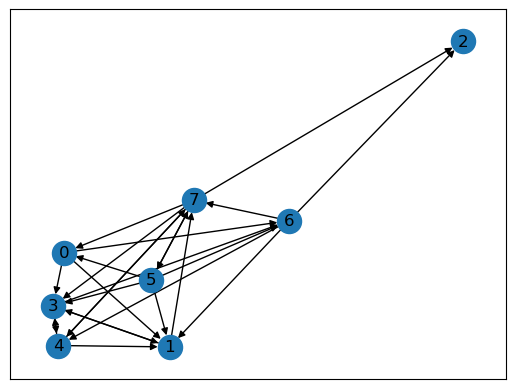

In [466]:
n=8
G4,B4=make_asymmetric_graph (n, seed=57)
nx.draw_networkx(G4)

A second example.  Make sure you understand the connection between the adjacency matrix and the
graph.  A 1 in column $j$ of row $i$ ($B[i,:]$) means there is an edge from $i$ to $j$.  Equivalently, 
a 1 in row $i$ of column $j$ ($B[:,j]$) means there is an edge from $i$ to $j$.

More succinctly, $B[i,j]=1$ means there is an edge from $i$ to $j$.

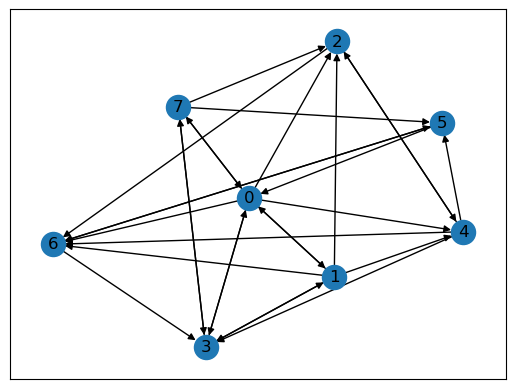

In [56]:
n=8
(G2,B2) = make_asymmetric_graph(n,seed=47)
nx.draw_networkx(G2)

In [57]:
B2

array([[0., 1., 1., 1., 1., 0., 1., 1.],
       [1., 0., 1., 1., 1., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0.],
       [1., 1., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0., 1., 1., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0.],
       [1., 0., 1., 1., 0., 1., 0., 0.]])

In [476]:
def katz_centrality_vector(A, power, alpha=.85, beta=1.0, 
                           personalization=None, verbose=0):
    """
    This version works with both direct and undirected graphs in
    the networkx environment.  See the documentation for pagerank.
    """
    (n,m) = A.shape
    assert n == m, "Only square matrices allowed!"
    if personalization is None:
        personalization = np.ones(n)
    One = beta * personalization
    x = np.zeros(n)
    check_every_n = math.floor(power/10)
    for i in range(power):
        if verbose and (i+1)%check_every_n == 0:
            print(f"Vertex {x.argmax()}: {math.floor(x.max()):>9,}")
        x = (alpha * (x@A)) + One
    return x


Let's compute the Katz Centrality vector for asymmetric adjacency matrix (= directed graph).
We first need to compute eigenvalues to find appropriate $\alpha$s.

Since the adjacency matrix is asymmetric, imaginary eigenvalues are possible, though they do
not arise in this instance.

In [467]:
random.seed(42)
random.seed(42)

eig_val0 = find_leading_eigenval(B4)
print(f'eigv: {eig_val0:.2f}')
max_alpha0 = 1/eig_val0
katz_centrality_vector(B4, 100, alpha=max_alpha0-.1,verbose=1)

eigv: 3.08+0.00j
Vertex 3:         4
Vertex 3:         4
Vertex 3:         4
Vertex 3:         4
Vertex 3:         4
Vertex 3:         4
Vertex 3:         4
Vertex 3:         4
Vertex 3:         4
Vertex 3:         4


/var/folders/_q/2s1hy5bx1l7f9j1lw9zjgt19_wb463/T/ipykernel_48097/2797797203.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  print(f"Vertex {x.argmax()}: {math.floor(x.max()):>9,}")


array([2.2889779 +0.j, 4.42791688+0.j, 2.53434598+0.j, 4.59526549+0.j,
       3.565082  +0.j, 1.86961577+0.j, 2.96352484+0.j, 3.87695324+0.j])

The Katz_centrality leader is also an indegree centrality leader.

In [469]:
B4.sum(axis=0)

array([2., 5., 2., 5., 3., 1., 3., 4.])

## Page Rank

Pagerank was first discussed under that name in a paper describing Google's framework for web search,
in particular, its method for
ranking pages retrieved by a web search engine.  The idea is that some
sort of metric for assigning importance to pages should play a key role.

Brin, S. and Page, L. The Anatomy of a large-scale hypertextual Web search engine.  *Comput.
Netw.* **30**  107-117(1998).

Pagerank is thus essentially a centrality measure, and as it happens, it
is closely related to Katz Centrality. But, in this application, we are thinking
mainly about the world wide web, a directed graph with some special
properties. Consider Newman's example:  The *Yahoo!* Directory
is an extremely important page, and it points to my web page, but it also points to millions of
other web pages.  Should all of our pages receive extremely high centrality values simply
because the *Yahoo!* directory page points to them? Probably not.

Solution: We qualify the degree to which nodes confer high centrality
on their neighbors by dividing their centrality weight by their out-degree.  This means 
nodes with extremely high out-degree should receive less weight
when propagating their centrality. We modify our basic definition of Katz Centrality (5') to
take account of a node's outdegree.

$$
(15)\,\,  x_{i} = \alpha \sum_{j} A_{ij} \frac{x_j}{k^{out}_{j}} + {\mathbf 1}
$$

An issue is that there can of course be vertices with 0 outdegree.  This expression is undefined in
those cases.  Notice that it's also true that in such cases $A_{ij}$ will be 0.  So what we want to do is set
$k^{out}_{j}$ to be 1 in those cases (the exact value doesnt matter).
Then

$$
A_{ij} \frac{x_j}{k^{out}_{j}} = 0
$$

And vertices like $j$ will correctly contribute nothing to the centrality of vertex $i$.

In matrix terms:

$$
(16)\,\,x = \alpha AD^{-1}x + {\mathbf 1}
$$

where D is the diagonal matrix with diagonal elements $D_{ii} = \max(k^{out}_{i}, 1)$.

Solving (16):

$$
(17)\,\,x = (I - \alpha AD^{-1})^{-1}{\mathbf 1}
$$

The inverse on the RHS can be simplified as follows:

$$
\begin{array}[t]{l}
(I - {\alpha}AD^{-1})^{-1}\\
D (D^{-1}\,(I - \alpha AD^{-1})^{-1})\\
D \,((I - \alpha AD^{-1})\,D)^{-1}\\
D \,(D - \alpha AD^{-1}D)^{-1}\\
D \,(D - \alpha A)^{-1}\\
\end{array}
$$

Substituting back into (17)

$$
(18)\,\,x = D \,(D - \alpha A)^{-1}{\mathbf 1}
$$

For practical computational purposes, however, we will use equation (16)
much as we used (5') for computing Katz Centrality.

Working with (16), then, let's add two fine points.  First, we may want to start with
some initial assignment of centrality values to the vertices other than 1.
Let's call that number $\beta$.  It's best to think of $\beta$ as a weight indicating
how much importance we attach to the intrinsic centralities of vertices
and $\alpha$ as a weight indicating how much importance we attach to the 
centrality propagation process, which relies on how the vertices are connected.

$$
(19)\,\, x = \alpha AD^{-1}x + \beta\,{\mathbf 1}
$$

The usual practice is to have $\alpha$ and $\beta$ sum to 1, though nothing in  the
logic we've used thuse far requires that (what is still required is that $\alpha \lt \kappa_{1}^{-1}$)
Now suppose we wish to assign different initial centralities to different vertices.
for example, in a document query system, each document might be assigned a probability
indicating how likely it is to be relevant.

Let's call that vector ${\mathbf p}$ (for personalization):

$$
(20)\,\,x = \alpha AD^{-1}x + \beta\,{\mathbf p}
$$

In many instances we will still use ${\mathbf 1}$ as our personalization vector.

#### Making $D^{-1}$

We consider how to compute $D^{-1}$ in Python.  We'll start with a graph which has
a vertex with 0 out degree, since that is what led us to complicate our definition
of $D$.

2


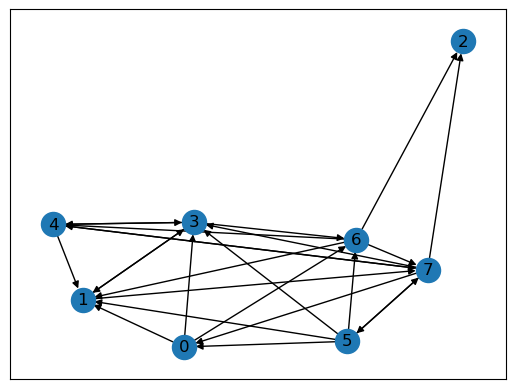

In [5]:
n=8

G,B=make_asymmetric_graph (n, seed=57)
outdegs = B.sum(axis=1)
if outdegs.min() == 0:
   print(outdegs.argmin())
 
nx.draw_networkx(G)

As desired, vertex 2 has no outward bound edges.

The corresponding adjacency matrix:

In [62]:
B

array([[0., 1., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1.],
       [1., 1., 0., 1., 0., 0., 1., 1.],
       [0., 1., 1., 0., 1., 0., 0., 1.],
       [1., 0., 1., 1., 1., 1., 0., 0.]])

Sum of cols of B: indegrees.  Note According to the standard interp  in Newman, this is wrong.  But this
is how 2D adjacency arrays are interpreted in networkx, which is what will guide us
in writing the code below.

In [63]:

indegs = B.sum(axis=0)
indegs

array([2., 5., 2., 5., 3., 1., 3., 4.])

In [64]:
# indegree of vertex 2
indegs[2]

2.0

Sum of rows: outdegrees.

In [65]:
outdegs = B.sum(axis=1)
outdegs

array([3., 2., 0., 3., 3., 5., 4., 5.])

Row w index 2 shows that vertex 2 has out degree 0.

In [774]:
B[2,:]

array([0., 0., 0., 0., 0., 0., 0., 0.])

Row w index 1 shows that vertex 1 has out degree 2.

In [775]:
B[1,:]

array([0., 0., 0., 1., 0., 0., 0., 1.])

In [776]:
outdegs = B.sum(axis=1)
outdegs

array([3., 2., 0., 3., 3., 5., 4., 5.])

The is the diagonal of $D^{-1}$.

In [779]:
adjusted_outdegs = np.where(outdegs > 0, outdegs, 1)
adjusted_outdegs_inv = 1/adjusted_outdegs
adjusted_outdegs_inv

array([0.33333333, 0.5       , 1.        , 0.33333333, 0.33333333,
       0.2       , 0.25      , 0.2       ])

Combining our steps, we can now make $D^{-1}$.

In [778]:

outdegs = B.sum(axis=1)
adjusted_outdegs = np.where(outdegs > 0, outdegs, 1)
adjusted_outdegs_inv = 1/adjusted_outdegs
D_inv = np.diag(adjusted_outdegs_inv)
D_inv

array([[0.33333333, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.33333333, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.33333333,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.2       , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.25      , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.2       ]])

Per equation (16) above (= 7.16 in Newman, p. 176, 1st Edition), we'd like to implement `page_rank` by calling `katz_centrality_vector` on $AD^{-1}$.

There is one complication however. $A$ needs to be transposed.  

Here's why.  The pagerank equation (from Newman) is
    
$$
x_{i} = \alpha \sum_{j} A_{ij} \frac{x_j}{k^{out}_{j}} + {\mathbf 1}
$$

Inside the sum,  $A[i,j]=1$ means there is an edge **from** $j$ to $i$:
       
       1.  In a directed graph: The centrality of vertex i is the sum of the centralities of vertices sending edges to vertex $i$.
       2.  We are dividing vertex $j$'s centrality $x_j$ by vertex $j$'s OUTdegree.
    
But to stay consistent with networkx (in particular the functions
that map back and forth between numpy matrices and networkx graphs), 
$A_{ij}$ needs to represent an edge from i to j.  So we implement
the $AD^{-1}$ of Newman's equation as $D^{-1}A$.  
Similarily, the definition of katz_centrality_vector needs implement the
basic katz-centrality recursion using $x^{T}A$ in place of $Ax$.

In [25]:
def page_rank (A, power, alpha=None, tol=.1, beta=None, personalization = None, verbose=0):
    """
    The pagerank equation (from Newman) is
    
    x_{i} = \alpha \sum_{j} A_{ij} \frac{x_j}{k^{out}_{j}} + {\mathbf 1}
    

    But to stay consistent with networkx, A_{ij} represents an edge from i to j.  
    
    So we implement the $AD^{-1}$ of the equation as $D^{-1}A$. 
    
    """
    (n,m) = A.shape
    T =  get_D_inv(A)@A
    if alpha is None:
        eig_val = find_leading_eigenval(T)
        max_alpha = 1/eig_val
        alpha = max_alpha - tol
        if verbose:
            print('eig_val:', eig_val, 'alpha:', alpha)
    if beta is None:
        if alpha > 1:
            print('Warning. alpha is greater than 1.')
            beta = 1.0
        else:
            beta = 1 - alpha
    if personalization is None:
        personalization = np.ones(n)/n
    return katz_centrality_vector(T, power, alpha=alpha, beta=beta, 
                                  personalization=personalization,
                                  verbose=verbose),alpha

def katz_centrality_vector(A, power, alpha=.85, beta=1.0, 
                           personalization=None, verbose=0):
    """
    This version works with both direct and undirected graphs in
    the networkx environment. It uses $x^{A}$ in place of $Ax$. See the comments on
    pagerank in the notebook text and the documentation for pagerank.
    """
    (n,m) = A.shape
    assert n == m, "Only square matrices allowed!"
    if personalization is None:
        personalization = np.ones(n)
    One = beta * personalization
    x = np.zeros(n)
    check_every_n = math.floor(power/10)
    for i in range(power):
        if verbose and (i+1)%check_every_n == 0:
            print(f"Vertex {x.argmax()}: {math.floor(x.max()):>9,}")
        x = (alpha * (x@A)) + One
    return x


def get_D_inv (A):
    """
    A is an adjacency matrix where the sum of the 1s in row $i$ gives the 
    OUTdegree of vertex $i$. That is, $A_{ij}=1$ indicates an edge from  
    vertex $i$ to vertex $j$.  
    """
    outdegs = A.sum(axis=1)
    adjusted_outdegs = np.where(outdegs > 0, outdegs, 1)
    return np.diag(1/adjusted_outdegs)

def old_find_leading_eigenval (A):
    """
    If A is symmetric eigvalsh will certainly be faster.  See 
    find_leading_eigval_check_symmetric
    """
    return np.linalg.eigvals(A).max()


def find_leading_eigenval_by_power_method(A,max_iters=30):
    """
    Essentially the power method finds the first eigenvalue and first 
    eigenvector of a matrix.  The basic algorithm finds the first eigenvector,
    from which the corresponding eigenvalue is easily computed.
    
    Note the following now entirely correct vaceat from some MIT course notes:
    
      "If two eigenvalues are of equal absolute value and opposite sign the
       method will not converge. 
          ---https://web.mit.edu/18.06/www/Spring17/Power-Method.pdf"
    
    Let's call these zero-sum eigenvalues. There are certainly examples galore. 
    In seed range(40,60) there are 3 examples.
    
    random.seed(51)
    T= make_symmetric_adjacency_matrix (m)
    
    which gives
    
    array([[0., 0., 0., 0.],
           [0., 0., 0., 1.],
           [0., 0., 0., 1.],
           [0., 1., 1., 0.]])
           
    This singular matrix has eigenvalues of equal magnitude and opposite sign
    
    >>> np.linalg.eigvals(T)
    array([ 1.41421356, -1.41421356,  0.        ,  0.        ])

    Given any input vector The power method oscillates betyween two vectors.
    for example
    
    v0= [0.43701876 0.46798616 0.48795425 0.56022626]
    v1= [0.         0.58604727 0.58604727 1.        ]
    v2= [0.         0.85317351 0.85317351 1.        ]
    v3 = v1           
    v4 = v2 
    
    ....
    
    Another example with zero-sum eigenvalues.
                
    T1 = array([[0., 1., 0., 0],
                [1., 0., 1., 0.],
                [0., 1., 0., 0.],
                [0, 0., 0., 0.]])
       
    Both matrices,  T and T1 are also of reduced rank (have 0-eigenvalues)  
    That means the proof that the sum of powers of A converges fails, because 
    there can be vectors in R^4 that are not expressible as a linear combination 
    of the eigenvectors (the eigenvectors are not a basis for R^4).  However the
    zero-sum property which may be more relevant to the oscillating behavior. 
    In this case the zero-sum eigenvalues are 1 and -1.
    
    Now having a zero eigenvalue and having
    zero-sum evals is a necessary but not a sufficient condition for non convergence.
    The minimal pair is seeds 51 [zero-sum evals plus two 0 evals with 
    non-convergence and 55 [zero-sum evals plus two 0 evals and 
    converges]. There is a possibility that this is an accident of what
    starting vector was used, and that both can be non-convergent.
    
    Theoretically using the powers method to find only the leading eval ought
    to be faster than using np.eigvals to find all of them.  Havent tested this yet.
    
    
    """
    e_vec = np.random.rand(A.shape[0])
    for _ in range(max_iters):
        e_vec0 = A @ e_vec
        e_val,e_vec = normalize2(e_vec0)
    return e_val

def normalize(x):
    fac = abs(x).max()
    x_n = x / fac
    return fac, x_n

def find_leading_eigenval (A,tol=.01):
    """
    If A is symmetric eigvalsh will certainly be faster.  
    See find_leading_eigval_check_symmetric
    This returns the eval with the highest absolute value.
    """
    evals = eigvals(A)
    pevals = np.abs(evals)
    cand1 = pevals[pevals.argsort()[-1]]
    for ev in evals:
        if ev-cand1 < tol:
            return ev
    # else return the highest absolute value, preserving sign
    return evals[pevals.argsort()[-1]]

def normalize2(x):
    """
    Bug?  If fac is a minimum because x has negative elements, then
    fac*x_n may not equal x.
    """
  
    fac = abs(x).max()
    x_n = x / x.max()
    return fac, x_n

def normalize(x):
    fac = abs(x).max()
    x_n = x / fac
    return fac, x_n

An alternative implementation of page_rank just transposes A and then exactly implements
the page rank equations from our discussion of Newman.

In [ ]:
import math
import numpy as np

def alt_page_rank (A, power, alpha=None, tol=.1, beta=None, personalization = None, verbose=0):
    """
    A needs to be transposed here.  Here's why.  The pagerank equation (from Newman) is
    
    x_{i} = \alpha \sum_{j} A_{ij} \frac{x_j}{k^{out}_{j}} + {\mathbf 1}
    
    Inside the sum each edge ij is an edge FROM j to i:
       
       1.  In a directed graph" The centrality of vertex i is the sum of the centralities of 
           vertices spawning its incoming edges
       2.  we are dividing j's centrality x_j by j's OUTdegree
    
    But to stay consistent with networkx, A_{ij} represents an edge from i to j.  So we implement
    the $AD^{-1}$ of the eqution as $A^{T}D^{-1}$.  Here A^{T} is the transpose of A, a matrix in which row i
    give the vertices INccoming to i. And $D^{-1}_{ii} = max(k^{out}_{i},1)$; we compute $k^{out}_{i}$ using
    A.
    
    """
    (n,m) = A.shape
    T = A.T @ get_D_inv(A)
    if alpha is None:
        eig_val = find_leading_eigenval(T)
        max_alpha = 1/eig_val
        alpha = max_alpha - tol
        if verbose:
            print('eig_val:', eig_val, 'alpha:', alpha)
    if beta is None:
        if alpha > 1:
            print('Warning. alpha is greater than 1.')
            beta = 1.0
        else:
            beta = 1 - alpha
    if personalization is None:
        personalization = np.ones(n)/n
    return alt_katz_centrality_vector(T, power, alpha=alpha, beta=beta, personalization=personalization,
                                  verbose=verbose),alpha

def alt_katz_centrality_vector(A, power, alpha=.85, beta=1.0, 
                               personalization=None, verbose=0):
    """
    This version works undirected graphs (symmetric adjacency matrices) 
    or with directed graphs in which the $A_{ij}=1$ in the adjacency matrix
    encodes an edge from vertex j to vertex i.  This version is consistent with Newman's
    equation for KC as written:
    
    $$
    x_{i}  =  \alpha \sum_{j}  A_{ij}  + 1
    $$
    
    In a directed graph the general convention is to have vertex i's importance
    depend on the centrality of the edges pointing TO it, so this version of the 
    equation assumes the value of $A_{ij}$ encodes the presence of an edge 
    from $j$ to $i$.
    
    But the code in networkx relating adjacency matrices to graphs assumes $A_{ij}=1$ 
    encodes an edge in the opposite direction.  So in order to use this function
    for classic Katz Centrality on a networkx adjacency matrix  A(which we assume through this
    notebook), call it as follows:
    
    alt_katz_centrality_vector(A.T, power)
    
    
    """
    (n,m) = A.shape
    assert n == m, "Only square matrices allowed!"
    if personalization is None:
        personalization = np.ones(n)
    One = beta * personalization
    x = np.zeros(n)
    check_every_n = math.floor(power/10)
    for i in range(power):
        if verbose and (i+1)%check_every_n == 0:
            print(f"Vertex {x.argmax()}: {math.floor(x.max()):>9,}")
        x = (alpha * (A @ x)) + One
    return x

We try pagerank first with a symmetric adjacency matrix.

In [26]:
import random

n=8

random.seed(31)
B3 = make_symmetric_adjacency_matrix (n)
outdegs = B3.sum(axis=1)
if outdegs.min() == 0:
   print(outdegs.argmin())
 
#using nx (and Google) default val for alpha
alpha=.85
pr_centralities,alpha2 = page_rank (B3, 100, alpha=alpha, verbose=1)
pr_centralities/=pr_centralities.sum()
pr_centralities

1
Vertex 5:         0
Vertex 5:         0
Vertex 5:         0
Vertex 5:         0
Vertex 5:         0
Vertex 5:         0
Vertex 5:         0
Vertex 5:         0
Vertex 5:         0
Vertex 5:         0


array([0.11333228, 0.02097902, 0.15693959, 0.06823027, 0.11267538,
       0.20484773, 0.15622663, 0.1667691 ])

In [27]:
G3 = nx.from_numpy_matrix(B3,create_using=nx.Graph)
cdict = nx.pagerank(G3,alpha=alpha)
# Turn this into a numpy array
nx_centralities = np.array([cdict[i] for i in range(n)])
nx_centralities

array([0.11333271, 0.02097902, 0.1569391 , 0.06823044, 0.11267497,
       0.20484826, 0.15622684, 0.16676866])

Check!

Note the leading eigenvalue of $AD^{-1}$ is 1.

In [29]:
eig_val = find_leading_eigenval(B3@get_D_inv (B3))
eig_val

1.0

A note on undirected $AD^{-1}$ graphs for symmetric Adjacency matrices.

The leading eigenvector is 1, and the corresponding eigenvector is

$$
[k_{0},\,k_{1},\,\dots k_{n}],
$$

where $k_{i}$ is the degree of vertex $i$.  See Newman for discussion.

In [30]:
D_inv3 = get_D_inv(B3)
T3 = B3@D_inv3
evals, evecs = np.linalg.eig(T3)
print(evals.argmax())
# 1 is the leading eigenvalue
evals

0


array([ 1.00000000e+00,  6.20552097e-01, -8.49857144e-01,  2.27945304e-01,
       -2.08801444e-17, -6.34416633e-01, -3.64223625e-01,  0.00000000e+00])

The leading eigenvector is proportional to the degrees of the vertices; that is, the degree
vector is a vector is in the 1-dimensional eigenspace belonging to the leading eigenvector.

In [33]:
evec0 = evecs[:,evals.argmax()]
outdegs = B3.sum(axis=1)
evec0,outdegs,evec0*(outdegs[0]/evec0[0])

(array([-0.2773501 ,  0.        , -0.41602515, -0.13867505, -0.2773501 ,
        -0.5547002 , -0.41602515, -0.41602515]),
 array([2., 0., 3., 1., 2., 4., 3., 3.]),
 array([ 2., -0.,  3.,  1.,  2.,  4.,  3.,  3.]))

Checking eigenvector property on $AD^{-1}$.

In [83]:
i = 0
print(evals[i] * evecs[:,i])
print(T3 @ evecs[:,i])

[-0.2773501   0.         -0.41602515 -0.13867505 -0.2773501  -0.5547002
 -0.41602515 -0.41602515]
[-0.2773501   0.         -0.41602515 -0.13867505 -0.2773501  -0.5547002
 -0.41602515 -0.41602515]


Next we'll try directed graphs, which is where pagerank really matters.

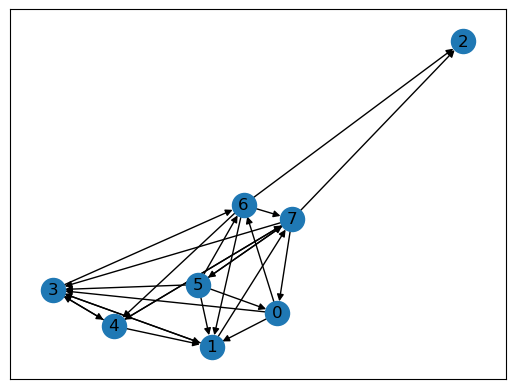

In [94]:
# Chosen to have a vertex w/ k_{out}=0 
n=8
# seed = 57 has a vertex with 0 outdegree
G4,B4=make_asymmetric_graph (n, seed=57)
nx.draw_networkx(G4,with_labels=True)

Note vertex 2 has 0 outdegree.  This will allow us to check the definition of D.

In [90]:
pr_centralities,alpha = page_rank (B4, 100, verbose=0)
pr_centralities/=pr_centralities.sum()
pr_centralities

array([0.05699076+0.j, 0.18035298+0.j, 0.07399102+0.j, 0.20930946+0.j,
       0.14190724+0.j, 0.04770352+0.j, 0.10801976+0.j, 0.18172526+0.j])

In [86]:
alpha

(0.9734384947298097+0j)

In [88]:
cdict = nx.pagerank(G4,alpha=alpha)
# Turn cdict into a numpy array for easy comparison
nx_centralities = np.array([cdict[i] for i in range(n)])
nx_centralities

array([0.0569902 , 0.18035297, 0.07399074, 0.20931014, 0.14190754,
       0.04770304, 0.10801948, 0.18172589])

In [461]:
pr_centralities.argsort()

array([5, 0, 2, 6, 4, 7, 1, 3])

In [462]:
nx_centralities.argsort()

array([5, 0, 2, 6, 4, 1, 7, 3])

In [92]:
alpha

(0.9734384947298115+0j)

outdegree centrality.  Pr adheres pretty closely.

Returning to Katz centrality.  We try it on a directed graph.

In [239]:
alpha22 = make_alpha(B4,eps=.1)
kc_dict = nx.katz_centrality(G4,alpha=alpha22)
nx_kc = np.array([kc_dict[i] for i in range(len(kc_dict))])
nx_kc

array([0.23812053+0.j, 0.46063255+0.j, 0.26364596+0.j, 0.47804168+0.j,
       0.37087254+0.j, 0.19449463+0.j, 0.30829308+0.j, 0.40331626+0.j])

In [230]:
kcv = katz_centrality_vector(B4, 100, alpha=alpha22)
kcv

array([2.2889779 +0.j, 4.42791688+0.j, 2.53434598+0.j, 4.59526549+0.j,
       3.565082  +0.j, 1.86961577+0.j, 2.96352484+0.j, 3.87695324+0.j])

In [231]:
kcv/nx_kc

array([9.61268609+0.j, 9.61268781+0.j, 9.61268663+0.j, 9.61268802+0.j,
       9.61268783+0.j, 9.61268577+0.j, 9.61268681+0.j, 9.61268769+0.j])

## HITS (Hyperlink-Induced Topic Search)

Let's look at another approach to centrality.  Thus far we've assumed all centrality depends on 
incoming edges.  That is, the guiding intuition has been that the centrality of vertex $i$ is the
sum of the centralities of the vertices spawning edges **to** vertex $i$.  But we could
just as easily have gone the other way and defined centrality on the basis
of outgoing edges.  
Then the centrality of vertex $i$ would be the
sum of the centralities of the vertices accepting edges **from** vertex $i$.
We had some initial application ideas that motivated defining importance based on incoming
edges (the world wide web), but in the general case there might well be other kinds of importance
depending on outgoing edges.   For example, in a network where the vertices are papers
and links are from citing papers to papers cited, we might well be
interested in papers that cite a lot of other papers, with citations weighted
by how important the cited papers were.  This motivates the idea of defining
two kinds of centrality in terms of each other.  Let's call a paper that cites
a lot of other papers (outgoing links) a **hub** and papers that are cited
by a lot of other papers an **authority**.   Then following Klein (??), we adopt the following idea:

 1. Good authorities are pointed to by good hubs.
 2. Good hubs point to good authorities.

This would motivate a definition involving mutual dependence.  Note: as in all equations in this
notebook, we follow Newman's convention for an adjacency matrix $A$: $A_{ij}=1$ means that there is an
edge from $j$ to $i$.


$$
\begin{array}[t]{llcl}
(a) & a_{i} & = & \alpha \sum_{j} A_{ij} h_{j}\\
(b) & h_{i} & = & \beta \sum_{j} A_{ji} a_{j}\\
\end{array}
$$

Clause (a) says the authority centrality for vertex $i$ is proportional to the sum of the hub centralities
of the vertices $j$ that point to $i$.
Note the swapped indices in clause (b);
The hub centrality of vertex $i$ is proportional to the sum of  the authority centralities
of the vertices $j$ that $i$ points to.  Thus the two HITS centralities are defined via
a mutual recursion.

In matrix form

$$
\begin{array}[t]{llcl}
(a') & a & = & \alpha Ah\\
(b') & h & = & \beta A^{T}a
\end{array}
$$

#### Cocitation and Bibliographic coupling

Combining equations (a') and (b') we get

$$
\begin{array}[t]{llcl}
(a'') & a & = & \alpha \beta AA^{T}a\\
(b'')& h & = & \beta \alpha A^{T}Ah
\end{array}
$$

or 
$$
(A) \begin{array}[t]{llcl}
(a)& AA^{T}a & = & \lambda a\\
(b)& A^{T}Ah & = & \lambda h
\end{array}
$$
where $\lambda=(\alpha\beta)^{-1}$. Note that in this formulation we have eliminated
the mutual recursion in the definition of HITS; authority scores
are now defined in terms of a recursion on authority scores, and
similarly for hub scores.

That is, the authority centrality scores are given by the eigenvector of $AA^{T}$.
The hub centrality scores are given by the eigenvector of $A^{T}A$.
A couple of fine-print points. First, by an argument similar
to the one used for Katz Centrality, it can be shown that the eigenvector
in both cases must be the one corresponding to the leading eigenvalue.
Second, for equations A to have a solution at all,  $AA^{T}$ and $A^{T}A$
must share that eigenvalue.  Do they?  Will they always?  The answer is yes
and the proof is quite easy. Suppose $\lambda$ is an eigenvalue of $AA^{T}$
with eigenvector $a$. Then

$$
AA^{T}a  =  \lambda a
$$

Multiplying both sides by $A^{T}$:

$$
(A^{T}A)A^{T}a  = \lambda A^{T} a.
$$

Hence $A^{T} a$ is an eigenvector of $(A^{T}A)$
with eigenvalue $\lambda$.

But now we know that $A^{T} a$ is a vector satisfying
our requirements for $h$ in equation (A.b). That
means we can find $h$ easily (without another eigenvector computation)
once we know $a$:

$$
h = A^{T} a  
$$

This corresponds to Equation (7.26) in Newman, p, 180.

The matrices  $(AA^{T})$ and $(A^{T}A)$  have
played an important role elsewhere in network studies.  
If $A$ depicts a citation network where vertices represent
papers and a link from $i$ to $j$ represents the fact that 
paper $i$ contains a citation of paper $j$, 
then  $(AA^{T})$ and $(A^{T}A)$ are referred
to as the **cocitation matrix** (call it $C$ for short) and **bibliographic coupling
matrix** call it $B$ for short).  $C[i,j]$ contains the number of papers
cited by both papers $i$ and $j$.  

#### HITS relation to similarity 

As suggested by our descriptions, the cocitation matrix $C$ and bibliographic coupling
matrix matrix $B$ can be viewed as tables of similarity scores.
The larger $C[i,j]$ is,
the more similar the citation patterns of $i$ and $j$.
In the World WideWeb application the corresponding concept is similarity of
linking patterns, and we might we call $C$ the colinking matrix;
however, we will follow standard usage and continue to refer to $C$ as the cocitation matrix.
Conversely, $B[i,j]$ contains the number of papers that
have cited both  $i$ and $j$, or the number of web sites
that link to both sites $i$ and $j$. The larger that
number the more similar the communities interested in $i$ and $j$.
Thus, just as we did with
Katz Centrality, we have related a centrality measure to a similarity
measure. The relationship between the similarity and centrality
measures is very similar in the two cases.
The centrality measure of a vertex $i$ is the sum of the centralities
of each vertex $j$ weighted by their similarity to $i$.
Let's review that for $C$, the matrix used
for defining authority scores (the case for $B$ us quite similar).

Repeating (A.a)  as (B.a):
$$
(B) \begin{array}[t]{llcl}
(a)& AA^{T}a & = & \lambda a\\
(b)& a_{i} & = & \lambda \sum_{j} (AA^{T})_{ij}\, a_{j}
\end{array}
$$
In (B.b) we move back from matrix form to
vector sum form to define the authority score of vertex $i$
as the sum of the authority scores of
all vertices $j$, weighted by 
their (cocitation/linking) similarity to vertex $i$.

Having  said this, it is important to point out that
$AA^{T}$ is not ideal when viewed as a table of similarities.
$AA^{T}[i,j]$ contains the dot product of row $i$ ($A[i,:]$)
with row $j$ ($A[j,:]$). Let's look
at general properties of dot product as a similarity measure.

Dot product has been criticized
as a similarity measure because it lacks at least one important
properties of a similarity measure. It is not maximized
by self-similarity.  In general the dot product of a vector $v_{i} \cdot v_{j}$
can be larger than $v_{i} \cdot v_{i}$.

In fact this particular objection doesn't apply to
the sort of adjacency matrix we have
assumed, where the values are always 1 and 0, and the self
similarity of vertex $i$ in $C$ is just its outdegree  ($d_{i}$) and the maximum
value of $v_{i} \cdot v_{j}$ is $\min(d_{i}, d_{j})$.   There are still problems, however; acheiving this maximum
does not guarantee the vertices have identical links,
since one may be of higher degree than the other.
Obvious modifications to solve this problem (such
as using cosine instead of dot product)
move us away from the original intentions
of HITS.  


####  Checking the equations out in networkx

Let's create a nice directed graph for a toy example.

a [0.         0.43425855 0.18858048 0.18858048 0.18858048]
h [0.43425855 0.         0.18858048 0.18858048 0.18858048]


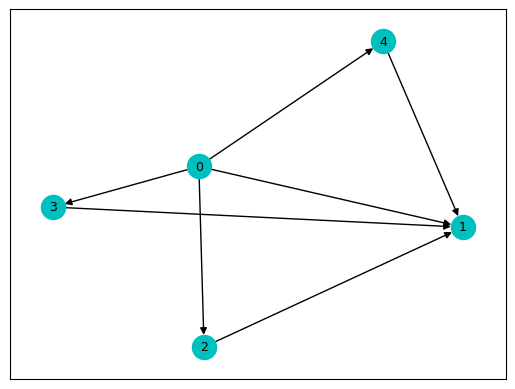

In [53]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Make node 0 a hub, 1 an authority
edgelist = [(0,1),(0,2),(0,3),(0,4),(2,1),(3,1),(4,1)]
G0=nx.DiGraph()
G0.add_edges_from(edgelist)

# Gets HITS centralities
h,a=nx.hits(G0)
# Convert the dictionary into an array
h_arr = np.array([h[i] for i in range(len(G0))])
a_arr = np.array([a[i] for i in range(len(G0))])
print ('a', a_arr)
print ('h', h_arr)


# Draw!
seed = 42
pos = nx.drawing.fruchterman_reingold_layout(G0,seed=seed)
nx.draw_networkx_nodes(G0,pos,node_color='c')
# Choosing the custom drawing route.
# Need to pass in a node label dict to get labels
dd = dict(zip(G0.nodes(),G0.nodes()))
nx.draw_networkx_labels(G0,pos, dd,font_size=9)
nx.draw_networkx_edges(G0,pos)
plt.show()
 

Clearly, vertex 1 is a much better authority than any other vertex. And clearly 0 is a much better
hub.  And the `a` and `h` scores reflect this.

Note also that vertex 0 has a low authority score (0), because no node points to it.  Conversely, node 1 has a 
low hub score (0), because it points to nothing.  Meanwhile, nodes 2, 3, and 4 have identical scores because their hub/authority situations are identical: Each points to the same great authority (node 1) and is pointed to by the same great hub (node 0).

Let's check whether the implementation respects equation A above (or equations (7.24) p.180 of Newman).

In [113]:
import numpy as np
A0 = nx.to_numpy_array(G0)

#cocitation network and bibliographic coupling network 
C0,B0 = A0@(A0.T),(A0.T)@A0

# Authority scores come from the leading eigenvector of the cocitation network
(C0_evals,C0_evecs) = np.linalg.eig(C0)
## Hub scores come from the leading eigenvector of the bibliographic coupling network 
(B0_evals,B0_evecs) = np.linalg.eig(B0)

In [106]:
A0

array([[0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [107]:
C0[0,2]

1.0

First eigenval is leader (has the greatest magnitude).

In [109]:
print(B0_evals)
max_B0_index = B0_evals.argmax()

[5.30277564e+00 1.69722436e+00 6.28687657e-18 3.00888257e-16
 0.00000000e+00]


So authority values (`B0_evec`) come from the first column of `B0_evecs`.

In [111]:
B0_evec = B0_evecs[:,max_B0_index]
B0_evec

array([ 0.        , -0.79917148, -0.34704704, -0.34704704, -0.34704704])

We want to compare this with what `nx.hits` gave us as the authority centralities vector.

In [79]:
a_arr

array([0.        , 0.43425855, 0.18858048, 0.18858048, 0.18858048])

So we show that `B0_evec` is a rescaling of `a_arr`.

In [112]:
(B0_evec[1]/a_arr[1])* a_arr

array([-0.        , -0.79917148, -0.34704704, -0.34704704, -0.34704704])

Now let's check Eq. 7.26, p. 180, which provides the easy way to compute `a_arr` once given `h_arr`.

In [81]:
a_arr0 = A0.T@h_arr
# demonstrating that a_arr0 is a rescaling of a_arr (Eq. 7.26, p. 180)
print(a_arr)
print((a_arr[1]/a_arr0[1])*a_arr0)



[0.         0.43425855 0.18858048 0.18858048 0.18858048]
[0.         0.43425855 0.18858048 0.18858048 0.18858048]


For a more complex example, let's returning to graph `G4`, the directed graph we used in demoing pagerank.

In [114]:
import numpy as np
A4 = nx.to_numpy_array(G4)

#cocitation network and bibliographic coupling network 
C4,B4 = A4@(A4.T),(A4.T)@A4

# Authority scores come from the leading eigenvector of the cocitation network
(C4_evals,C4_evecs) = np.linalg.eig(C4)
## Hub scores come from the leading eigenvector of the bibliographic coupling network 
(B4_evals,B4_evecs) = np.linalg.eig(B4)

In [97]:
C4

array([[3., 1., 0., 2., 2., 3., 1., 1.],
       [1., 2., 0., 0., 2., 2., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [2., 0., 0., 3., 1., 2., 2., 1.],
       [2., 2., 0., 1., 3., 3., 2., 1.],
       [3., 2., 0., 2., 3., 5., 2., 2.],
       [1., 1., 0., 2., 2., 2., 4., 2.],
       [1., 1., 0., 1., 1., 2., 2., 5.]])

In [98]:
C4[0,5]

3.0

Relating this value to `A4`, it is the dot product of row 0 `0` (`A4[0,:]`) with row 5 (`A4[5,:]`), or the number of out-edges vertex `0` shares with vertex `5`.

In [100]:
A4[0].dot(A4[5])

3.0

And in fact vertex 5 links to every one of vertex 0's out-neighbors

In [101]:
A4[0].dot(A4[0])

3.0

but also some links vertex 0 does not have, since it is of higher degree.

In [102]:
A4[5].dot(A4[5])

5.0

And here are the authority values.  In fact vertex 0 has a lower authority than vertex 5, which
is the most authoritative of all.

In [103]:
C4_evecs[:,C4_evals.argmax()]

array([0.36475229, 0.24790513, 0.        , 0.30309427, 0.38992712,
       0.54072096, 0.38087812, 0.35233822])

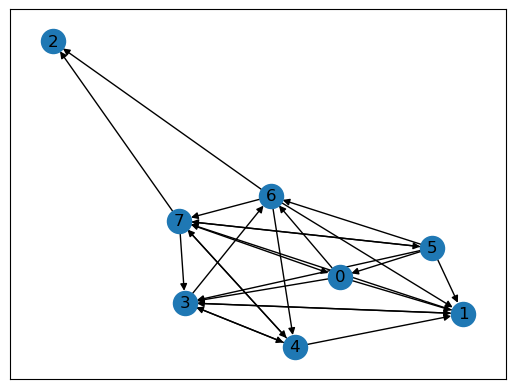

In [95]:
nx.draw_networkx(G4,with_labels=True)

#### Klein HITS Exercise

Here's a new graph and its hub and authority scores.  Answer some questions about how those scores turned out. A note for those not using to reading Python numbers in scientific notation.  Just think of the numbers with `e-09` in them as very small numbers, pretty much equal to 0.

h {1: -3.849065237055306e-17, 3: 0.6180339887498949, 2: 0.3819660112501052}
a {1: 0.6180339887498949, 3: -6.227918378471157e-17, 2: 0.38196601125010515}


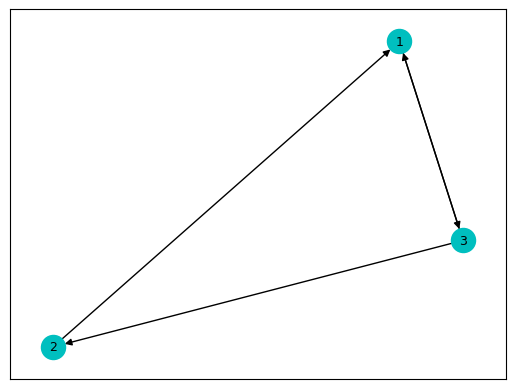

In [236]:
G0=nx.DiGraph()
# Make node 0 a hub,
G0.add_edge(1,3)
G0.add_edge(2,1)
G0.add_edge(3,1)
G0.add_edge(3,2)
h,a=nx.hits(G0)
print ('h', h)
print ('a', a)
# Draw!
pos = nx.drawing.fruchterman_reingold_layout(G0)
dd = dict(zip(G0.nodes(),G0.nodes()))
nx.draw_networkx_nodes(G0,pos, dd,node_color='c')
nx.draw_networkx_labels(G0,pos, dd,font_size=9)
nx.draw_networkx_edges(G0,pos)
plt.show()
 

### Questions



   1. Nodes  2 and 3 have indegree 1.  Why is node 3's authority score so small relative to node 2's 
    authority  score?
   2.  Nodes 1 and 2 both have outdegree 1.  Why is node 1's hub score so small relative to node 2's hub score?

## Igraph

In [477]:
import sys
sys.version

'3.10.6 (main, Oct  7 2022, 15:17:23) [Clang 12.0.0 ]'

For using the default (and arguably the best) drawing engine in igraph, the next cell needs to work.  

Install `pycairo` if not.

In [6]:
import cairo

Using `G4` from above, the graph used to illustrate `pagerank`.

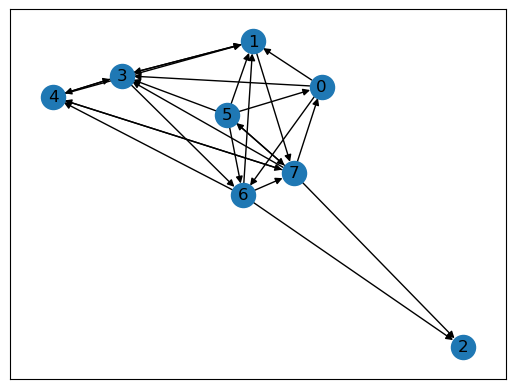

In [49]:
import networkx as nx
import igraph as ig
# Chosen to have a vertex w/ k_{out}=0 
n,seed=8,57
G4 = nx.gnp_random_graph(n, p=.5, seed=seed, directed=True)
B4 = nx.to_numpy_array(G4)
nx.draw_networkx(G4)
IG4 = ig.Graph.from_networkx(G4)
# Copy networkx names to be used as labels in drawing.
IG4.vs['label'] = IG4.vs['_nx_name']

A lot of people think the `igraph` visualizations are better than those of networkx,
especially when the visualization uses `igraph`'s default visualization engine, a graphic system called `cairo`,
ported to python under the name `pycairo`.

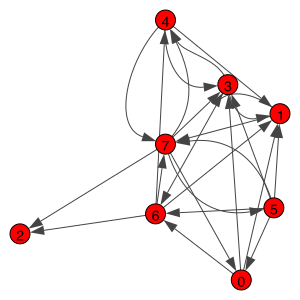

In [50]:
lo1 = IG4.layout_fruchterman_reingold()
#Constrain size of figure
bbox,margin =(300, 300), 20
ig.plot(IG4,layout=lo1,bbox=bbox,margin=margin)

It is possible to do visualization in igraph w/o installing `pycairo` by using matplotlib as the
visualization engine.  The small changes in the layout appear to be due to a rescaling and a rotation.

<AxesSubplot:>

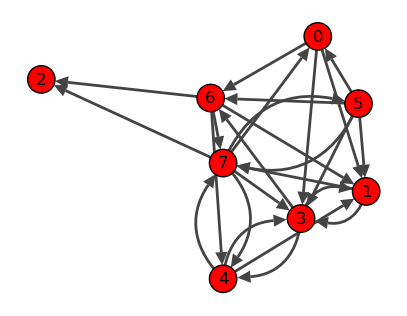

In [51]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,7))
ig.plot(IG4, layout=lo1, target=ax)

We can also create the `igraph` graph object directly from an adjacency matrix.
There is nothing corresponding to the `'_nx_name'` and attribute, so we have to
supply a sequence of names by hand.

In [6]:
IGG4 = ig.Graph.Adjacency(B4)
IGG4.vs['label'] = range(7)

We can draw this graph with a new layout or re-using the layout from above, because `IG4` and `IGG4` have the 
same vertices.

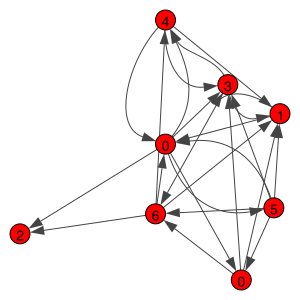

In [52]:
lo2 = IGG4.layout_fruchterman_reingold()
#Use old layout, constrain size 

bbox,margin =(300, 300), 20
ig.plot(IGG4,layout=lo1, bbox=bbox, margin=margin)
# Use new layout
#ig.plot(IGG4,layout=lo2)

In every way that matters the two graphs are the same.

In [8]:
print(IG4)

IGRAPH D--- 8 25 --
+ attr: _nx_name (v), label (v)
+ edges:
0 -> 1 3 6       2 ->             4 -> 1 3 7       6 -> 1 2 4 7
1 -> 3 7         3 -> 1 4 6       5 -> 0 1 3 6 7   7 -> 0 2 3 4 5


In [9]:
print(IGG4)

IGRAPH D--- 8 25 --
+ attr: label (v)
+ edges:
0 -> 1 3 6       2 ->             4 -> 1 3 7       6 -> 1 2 4 7
1 -> 3 7         3 -> 1 4 6       5 -> 0 1 3 6 7   7 -> 0 2 3 4 5


We see that `ig` pagerank agrees with `networkx`'s.

In [10]:
import numpy as np
ig_centralities = np.array(IG4.pagerank())
# playing with the damping parameter
#ig_centralities = np.array(IG4.pagerank(directed=True,damping=.98))
ig_centralities

array([0.06654295, 0.17466943, 0.08068815, 0.1984218 , 0.13690766,
       0.05687432, 0.1120651 , 0.17383059])

No disagreement to speak of.

In [11]:
kc_dict = nx.pagerank(G4)
nx_centralities = np.array([kc_dict[i] for i in range(len(kc_dict))])
nx_centralities

array([0.06654297, 0.17466966, 0.08068806, 0.1984218 , 0.13690749,
       0.05687427, 0.11206518, 0.17383058])

This algorithm appear to be close to networkx's and
converges after 10 iters on our example graph G4 on a very similar solution.

Drawing a more complicated graph, coloring communities:

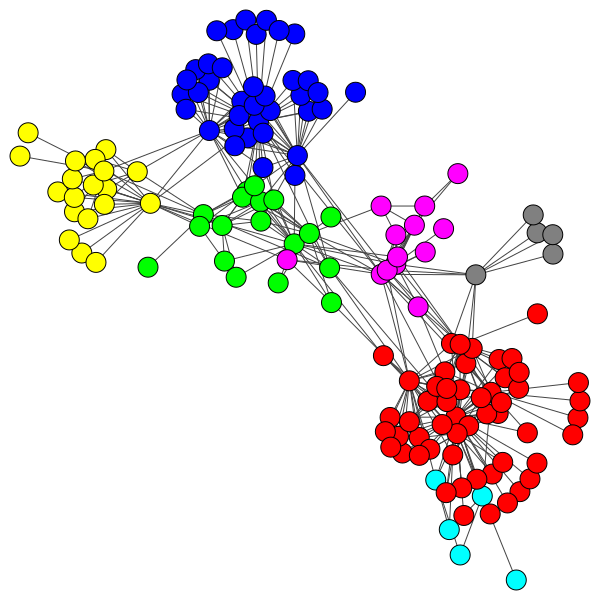

In [36]:
N,seed = 150, 51
g0 = nx.duplication_divergence_graph(N, .5, seed)
igg0=ig.Graph.from_networkx(g0)
# Less cluttered w/o labelling, else fiddle vertex fontsize
#igg0.vs['label'] = igg0.vs['_nx_name']
i=ig.community._community_infomap(igg0) 
pal = ig.drawing.colors.ClusterColoringPalette(len(i))
igg0.vs['color'] = pal.get_many(i.membership)
ig.plot(igg0)

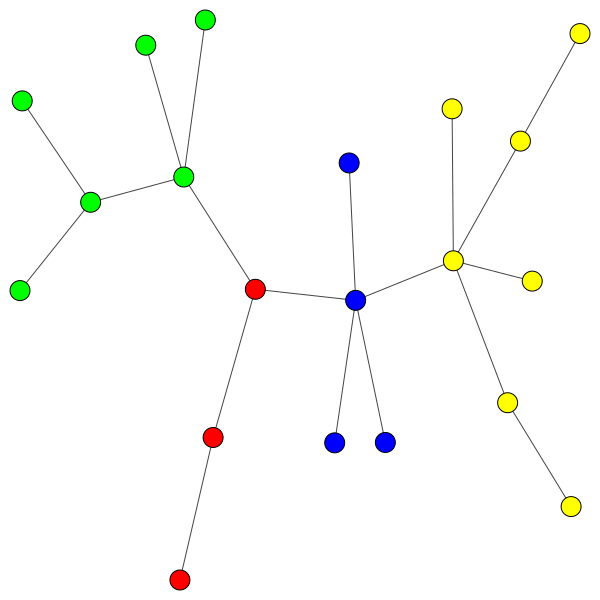

In [64]:
import igraph
g = igraph.Graph.Barabasi(n = 20, m = 1)
i = g.community_infomap()
pal = igraph.drawing.colors.ClusterColoringPalette(len(i))
g.vs['color'] = pal.get_many(i.membership)
igraph.plot(g)

### Diagonal matrices  (Weighting rows/columns)

In [21]:
M = np.arange(9).reshape((3,3))
D = np.diag(np.array([1,2,3]))

print("M:\n",M)
print("D:\n",D)
# Diag entries apply to columns of M
# easiest seen with column-space view of Matrix multiplication
print("MD:\n",M@D)
# Diag entries apply to rows of M
print(f"DM:\n{D@M}")

M:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
D:
 [[1 0 0]
 [0 2 0]
 [0 0 3]]
MD:
 [[ 0  2  6]
 [ 3  8 15]
 [ 6 14 24]]
DM:
[[ 0  1  2]
 [ 6  8 10]
 [18 21 24]]


In [68]:
D@M

array([[1., 1., 1.],
       [2., 2., 2.],
       [3., 3., 3.]])